In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

     |████████████████████████████████| 993kB 8.9MB/s 


In [0]:
link = 'https://drive.google.com/open?id=16cz3FoEbylTsMjoJOlc9xAnEViZ6Twdb' # The shareable link

fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('train.csv') 

16cz3FoEbylTsMjoJOlc9xAnEViZ6Twdb


In [0]:
link = 'https://drive.google.com/open?id=1-R7r1nEQBnUu3qGlH64LYyJ1CJyGgg5V' # The shareable link

fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('test.csv') 
  

1-R7r1nEQBnUu3qGlH64LYyJ1CJyGgg5V


In [0]:
import os
os.listdir('/content/')

['.config', 'adc.json', 'test.csv', 'train.csv', 'sample_data']

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
train = pd.read_csv('/content/train.csv',parse_dates=['Date.of.Birth','DisbursalDate'])
train.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,1985-07-31,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,1985-08-24,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,1993-12-30,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,1977-09-12,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [0]:
test = pd.read_csv('/content/test.csv',parse_dates=['Date.of.Birth','DisbursalDate'])

In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
UniqueID                               233154 non-null int64
disbursed_amount                       233154 non-null int64
asset_cost                             233154 non-null int64
ltv                                    233154 non-null float64
branch_id                              233154 non-null int64
supplier_id                            233154 non-null int64
manufacturer_id                        233154 non-null int64
Current_pincode_ID                     233154 non-null int64
Date.of.Birth                          233154 non-null object
Employment.Type                        225493 non-null object
DisbursalDate                          233154 non-null object
State_ID                               233154 non-null int64
Employee_code_ID                       233154 non-null int64
MobileNo_Avl_Flag                      233154 non-null int64
Aadhar_flag                   

In [0]:
train.isnull().sum()

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

In [0]:
test.isnull().sum()

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        3443
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

In [0]:
#treating Employment Type Null values

In [0]:
train['Employment.Type'].value_counts()

Self employed    127635
Salaried          97858
Name: Employment.Type, dtype: int64

In [0]:
#the nulls could be unemployed people
train['Employment.Type'].fillna('Unemployed', inplace = True)
test['Employment.Type'].fillna('Unemployed', inplace = True)

In [0]:
train['Year.of.Birth'] = train['Date.of.Birth'].dt.year
test['Year.of.Birth'] = test['Date.of.Birth'].dt.year

In [0]:
train['Year.of.Birth'].value_counts().values

array([10584, 10530, 10390, 10211, 10116, 10007,  9385,  9232,  8903,
        8633,  8441,  7922,  7489,  7481,  7140,  7018,  6788,  6178,
        5883,  5627,  5614,  5581,  5310,  4638,  4466,  4366,  4063,
        3721,  3147,  3081,  2522,  2397,  2268,  2188,  1773,  1604,
        1556,  1478,  1241,  1173,   816,   632,   621,   412,   337,
         169,    21,     1])

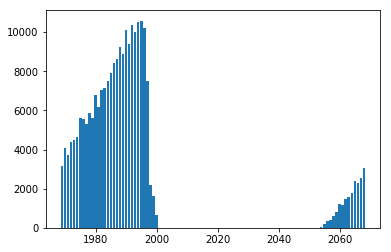

In [0]:
plt.bar(train['Year.of.Birth'].value_counts().index,train['Year.of.Birth'].value_counts().values)
plt.show()

In [0]:
train.loc[train['Year.of.Birth']>2040,'Year.of.Birth'] = train['Year.of.Birth'] - 100
test.loc[test['Year.of.Birth']>2040,'Year.of.Birth'] = test['Year.of.Birth'] - 100

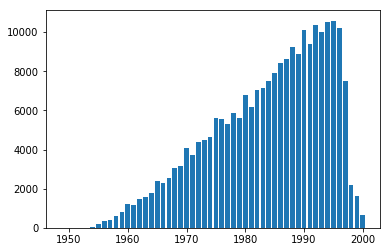

In [0]:
plt.bar(train['Year.of.Birth'].value_counts().index,train['Year.of.Birth'].value_counts().values)
plt.show()

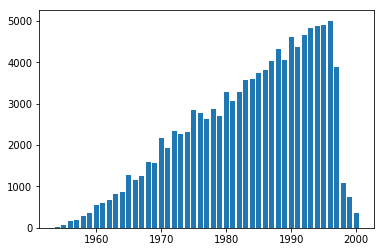

In [0]:
plt.bar(test['Year.of.Birth'].value_counts().index,test['Year.of.Birth'].value_counts().values)
plt.show()

In [0]:
train['DisbursalDate'] = train['DisbursalDate'].dt.year
test['DisbursalDate'] = test['DisbursalDate'].dt.year

In [0]:
train.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default', 'Year.of.Birth'],
      dtype='object')

In [0]:
train['DisbursalDate'].head()

0    2018
1    2018
2    2018
3    2018
4    2018
Name: DisbursalDate, dtype: int64

In [0]:
train.corr()['loan_default']

UniqueID                               0.033848
disbursed_amount                       0.077675
asset_cost                             0.014261
ltv                                    0.098208
branch_id                              0.030193
supplier_id                            0.027357
manufacturer_id                       -0.025039
Current_pincode_ID                     0.028419
DisbursalDate                               NaN
State_ID                               0.048075
Employee_code_ID                       0.020657
MobileNo_Avl_Flag                           NaN
Aadhar_flag                           -0.041593
PAN_flag                               0.002046
VoterID_flag                           0.043747
Driving_flag                          -0.005821
Passport_flag                         -0.007602
PERFORM_CNS.SCORE                     -0.057929
PRI.NO.OF.ACCTS                       -0.035456
PRI.ACTIVE.ACCTS                      -0.041451
PRI.OVERDUE.ACCTS                      0

In [0]:
train['AVERAGE.ACCT.AGE'].head()

0     0yrs 0mon
1    1yrs 11mon
2     0yrs 0mon
3     0yrs 8mon
4     0yrs 0mon
Name: AVERAGE.ACCT.AGE, dtype: object

In [0]:
train['avg_acct_age_mnth'] = ((train['AVERAGE.ACCT.AGE'].str.extract('(\d+)yrs').astype('int64')*12) + train['AVERAGE.ACCT.AGE'].str.extract('(\d+)mon').astype('int64'))
train['avg_credit_hist_mnth'] = ((train['CREDIT.HISTORY.LENGTH'].str.extract('(\d+)yrs').astype('int64')*12) + train['CREDIT.HISTORY.LENGTH'].str.extract('(\d+)mon').astype('int64'))

In [0]:
test['avg_acct_age_mnth'] = ((test['AVERAGE.ACCT.AGE'].str.extract('(\d+)yrs').astype('int64')*12) + test['AVERAGE.ACCT.AGE'].str.extract('(\d+)mon').astype('int64'))
test['avg_credit_hist_mnth'] = ((test['CREDIT.HISTORY.LENGTH'].str.extract('(\d+)yrs').astype('int64')*12) + test['CREDIT.HISTORY.LENGTH'].str.extract('(\d+)mon').astype('int64'))

In [0]:
train['NO.OF_INQUIRIES'].value_counts()

0     201961
1      22285
2       5409
3       1767
4        760
5        343
6        239
7        135
8        105
9         44
10        34
11        15
12        14
14         8
15         7
13         6
19         6
17         4
18         4
16         3
28         1
20         1
22         1
23         1
36         1
Name: NO.OF_INQUIRIES, dtype: int64

In [0]:
train.describe()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,DisbursalDate,State_ID,...,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default,Year.of.Birth,avg_acct_age_mnth,avg_credit_hist_mnth
count,233154.000000,233154.000000,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.0,233154.000000,...,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000
mean,535917.573376,54356.993528,7.586507e+04,74.746530,72.936094,19638.635035,69.028054,3396.880247,2018.0,7.262243,...,7.179998e+03,1.310548e+04,3.232684e+02,0.381833,0.097481,0.206615,0.217071,1983.899054,8.915764,16.252404
std,68315.693711,12971.314171,1.894478e+04,11.456636,69.834995,3491.949566,22.141304,2238.147502,0.0,4.482230,...,1.825925e+05,1.513679e+05,1.555369e+04,0.955107,0.384439,0.706498,0.412252,9.805992,15.106416,28.581255
min,417428.000000,13320.000000,3.700000e+04,10.030000,1.000000,10524.000000,45.000000,1.000000,2018.0,1.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1949.000000,0.000000,0.000000
25%,476786.250000,47145.000000,6.571700e+04,68.880000,14.000000,16535.000000,48.000000,1511.000000,2018.0,4.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1977.000000,0.000000,0.000000
50%,535978.500000,53803.000000,7.094600e+04,76.800000,61.000000,20333.000000,86.000000,2970.000000,2018.0,6.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1986.000000,0.000000,0.000000
75%,595039.750000,60413.000000,7.920175e+04,83.670000,130.000000,23000.000000,86.000000,5677.000000,2018.0,10.000000,...,0.000000e+00,1.999000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1992.000000,13.000000,24.000000
max,671084.000000,990572.000000,1.628992e+06,95.000000,261.000000,24803.000000,156.000000,7345.000000,2018.0,22.000000,...,3.000000e+07,2.564281e+07,4.170901e+06,35.000000,20.000000,36.000000,1.000000,2000.000000,369.000000,468.000000


In [0]:
train.shape

(233154, 44)

{'boxes': [<matplotlib.lines.Line2D at 0x7f9a8c08b978>],
 'caps': [<matplotlib.lines.Line2D at 0x7f9a81eef898>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f9a81eef2b0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f9a81eef710>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f9a8c08bb00>,
  <matplotlib.lines.Line2D at 0x7f9a8c08bd30>]}

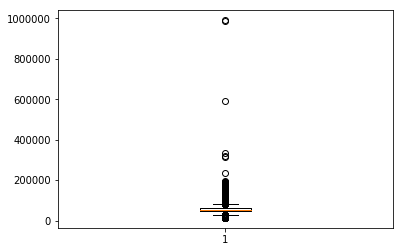

In [0]:
plt.boxplot(train['disbursed_amount'])

In [0]:
train = train[train['disbursed_amount']<400000]

In [0]:
train[train['disbursed_amount']>400000]

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,Year.of.Birth,avg_acct_age_mnth,avg_credit_hist_mnth


{'boxes': [<matplotlib.lines.Line2D at 0x7f9a81a019e8>],
 'caps': [<matplotlib.lines.Line2D at 0x7f9a81a01048>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f9a81e1f9e8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f9a81e1f550>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f9a81a01a90>,
  <matplotlib.lines.Line2D at 0x7f9a81a01f60>]}

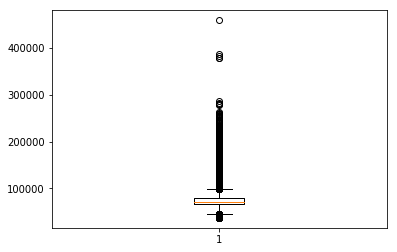

In [0]:
plt.boxplot(train['asset_cost'])

In [0]:
train[train['asset_cost']>1000000]

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,Year.of.Birth,avg_acct_age_mnth,avg_credit_hist_mnth


In [0]:
X = train
y = train.iloc[:,40]

In [0]:
y.head()

0    0
1    1
2    0
3    1
4    1
Name: loan_default, dtype: int64

In [0]:
train.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default', 'Year.of.Birth', 'avg_acct_age_mnth',
       'avg_credit_hist_mnth'],
      dtype='object')

In [0]:
X.drop(columns = ['UniqueID','Date.of.Birth','DisbursalDate','loan_default','AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH'], axis =1, inplace = True)

In [0]:
X.columns

Index(['disbursed_amount', 'asset_cost', 'ltv', 'branch_id', 'supplier_id',
       'manufacturer_id', 'Current_pincode_ID', 'Employment.Type', 'State_ID',
       'Employee_code_ID', 'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag',
       'VoterID_flag', 'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'NO.OF_INQUIRIES', 'Year.of.Birth', 'avg_acct_age_mnth',
       'avg_credit_hist_mnth'],
      dtype='object')

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X,y,test_size = 0.25)

In [0]:
# x_test.drop(columns = ['UniqueID','branch_id','supplier_id', 'manufacturer_id', 'Current_pincode_ID',
#                         'Date.of.Birth','DisbursalDate', 'State_ID', 'Employee_code_ID','MobileNo_Avl_Flag'], axis =1, inplace = True)

In [0]:
# categ_column = list(x_train.select_dtypes('object').columns)

In [0]:
categ_column = ['branch_id',	'supplier_id',	'manufacturer_id',	'Current_pincode_ID',	'Employment.Type',	'State_ID',	'Employee_code_ID',	'MobileNo_Avl_Flag',	'Aadhar_flag',	'PAN_flag',	'VoterID_flag',	'Driving_flag',	'Passport_flag',	'PERFORM_CNS.SCORE.DESCRIPTION']

In [0]:
!pip install catboost


import catboost
from catboost import Pool, CatBoostClassifier,cv


In [0]:
_train = Pool(x_train, label=y_train,cat_features= categ_column)
_valid = Pool(x_val, label=y_val,cat_features= categ_column)

In [0]:
model = CatBoostClassifier(subsample=0.6,
                           custom_loss='Logloss',
                           l2_leaf_reg = 10,
                           random_strength = 0,
                           max_depth=7,
                           eval_metric="AUC",
                           learning_rate=0.03,
                           iterations=60000,
                           bootstrap_type='Bernoulli',
                           task_type="GPU",
                           random_seed=42,
                           od_type="Iter")

fit_model = model.fit(_train,verbose_eval=1000, early_stopping_rounds=100,eval_set=[_valid],use_best_model=True,plot=False)

0:	learn: 0.6313639	test: 0.6348948	best: 0.6348948 (0)	total: 73.9ms	remaining: 1h 13m 56s
1000:	learn: 0.7091163	test: 0.6784089	best: 0.6784090 (997)	total: 45.1s	remaining: 44m 19s
bestTest = 0.6790455282
bestIteration = 1458
Shrink model to first 1459 iterations.


In [0]:
test.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'Year.of.Birth', 'avg_acct_age_mnth', 'avg_credit_hist_mnth'],
      dtype='object')

In [0]:
x_test = test
x_test.drop(columns = ['UniqueID','Date.of.Birth','DisbursalDate','AVERAGE.ACCT.AGE','CREDIT.HISTORY.LENGTH'], axis =1, inplace = True)

In [0]:
y_pred = fit_model.predict_proba(x_test)[:,1]

In [0]:
final = pd.DataFrame(y_pred)

In [0]:
final.to_csv('final.csv')